In [1]:
import numpy as np
from fireballpy import Fireball
from ase import Atoms
from ase.eos import EquationOfState
from ase.units import kJ
import matplotlib.pyplot as plt

In [2]:
avec = np.linspace(3.4, 3.75, num=15)
etot = np.empty_like(avec)
vol = np.empty_like(avec)
for i, a in enumerate(avec):
    atoms = Atoms(symbols=['C', 'C'],
                  positions=[(0.0, 0.0, 0.0),
                             (a/4, a/4, a/4)])  
    atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])
    atoms.calc = Fireball(fdata='HCSi', charges_method='mulliken_dipole_preserving', kpts=(4, 4, 4))
    etot[i] = atoms.get_potential_energy()
    vol[i] = atoms.get_volume()

In [3]:
eos = EquationOfState(vol, etot)
v0, e0, B = eos.fit()
print(f'B = {B / kJ * 1.0e24:.2f} GPa')
print(f'V = {v0:.2f} \u00C5\u00B3')
a = (v0 * 4) ** (1/3)
print(f'a = {a:.2f} \u00C5')
print(f'E = {e0:.2f} eV')

B = 546.83 GPa
V = 11.58 Å³
a = 3.59 Å
E = -307.30 eV


<Axes: title={'center': 'sj: E: -307.305 eV, V: 11.581 Å$^3$, B: 546.834 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

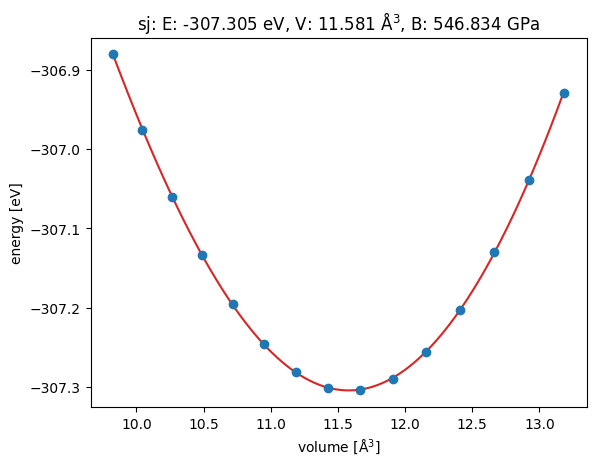

In [4]:
eos.plot()

In [5]:
atoms = Atoms(symbols=['C', 'C'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])
        
atoms.calc = Fireball(fdata='HCSi', charges_method='mulliken_dipole_preserving', kpts=(4, 4, 4))
atoms.get_potential_energy()
atoms.get_charges()
print(f'a = {a:.2f} \u00C5')
print(f'E = {atoms.calc.results['energy']:.2f} eV')
print(atoms.calc.results['shell_charges'])

a = 3.59 Å
E = -307.31 eV
[[1.23927654 2.63049188 0.1302297 ]
 [1.23927851 2.63049305 0.13023031]]


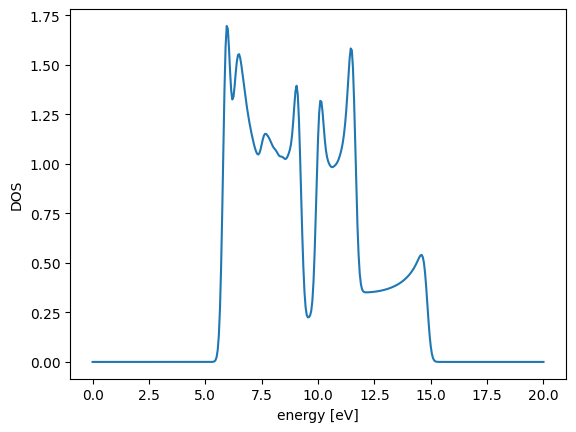

In [10]:
from ase.dft.dos import DOS
dos = DOS(atoms.calc, width=0.2, window=(0, 20))
d = dos.get_dos()
e = dos.get_energies()
plt.plot(e, d)
plt.xlabel('energy [eV]')
plt.ylabel('DOS')
plt.show()

In [11]:
from fireballpy.bands import BandPath
bp = BandPath(atoms=atoms, path='WLGXWK', npoints=200)

<Axes: ylabel='Energy [eV]'>

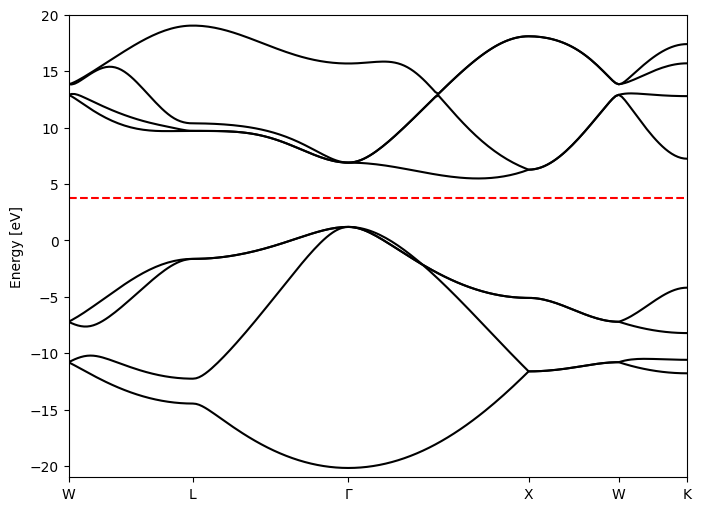

In [8]:
bp.plot(emin=-21,emax=20)